# Implemetation of Sinkhorn Algorithm from this [paper](https://arxiv.org/pdf/1802.04367.pdf)

### TODO: 
 * pseudocode

In [1]:
import numpy as np

In [2]:
def B(u, v, C, gamma):
    K = np.exp(-C/gamma)
    return np.matmul(np.matmul(np.diag(np.exp(u)), K), np.diag(np.exp(v)))

In [3]:
def sinkhorn(C, r, c, epsilon, gamma=0.5):  
    u = np.zeros(len(C))
    v = np.zeros(len(C))    
    
    k = 0
    while True:
        if k % 2 == 0:
            u = u + np.log(r) - np.log(B(u, v, C, gamma).sum(1))
            
        else:
            v = v + np.log(c) - np.log(B(u, v, C, gamma).sum(0))
        
        k += 1
        
        if np.abs(B(u, v, C, gamma).sum(1) - r).sum() +\
           np.abs(B(u, v, C, gamma).sum(0) - c).sum() <= epsilon:
            break
            
    return B(u, v, C, gamma), k

In [4]:
def sample_batch(n):
    C = np.random.uniform(0, 10, size=[n, n])
    p = np.random.dirichlet(np.ones(5), size=1).ravel()
    q = np.random.dirichlet(np.ones(5), size=1).ravel()
    return C, p, q

In [23]:
# matrix size NxN
N = 5
# number of experiments per gamma
n_exp_per_gamma = 1000

n_iterations = list()
for gamma in np.linspace(1e-4, 1, 25):
    for _ in range(n_exp_per_gamma):
        c, p, q = sample_batch(N)
        n_iterations.append(sinkhorn(c, p, q, gamma)[-1])
        
n_iterations = np.array(n_iterations)

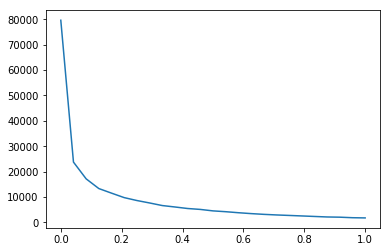

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(np.linspace(1e-4, 1, 25), n_iterations.reshape(-1, n_exp_per_gamma).sum(-1))